In [50]:
import re
import csv
from datetime import datetime

# Convert date into ms
def date_to_ms(date):
    date_format = "%Y-%m-%dT%H:%M:%S.%fZ"
    # Parse the date string into a datetime object
    date_object = datetime.strptime(date, date_format)
    # Calculate the timestamp in seconds
    timestamp_seconds = date_object.timestamp()
    # Convert the timestamp to milliseconds
    timestamp_milliseconds = int(timestamp_seconds * 1000)
    return(timestamp_milliseconds)

# convert Swedish local time (ms) into UTC time (ms)
def local_to_UTC(local_time):
    # remove 2 hours
#     print("local_time",local_time)
#     print("utc_time",local_time - 1000*60*60*2)
    return (int(local_time) - 1000*60*60*2)

file_path = "C:\\Users\\jerem\\Documents\\TrundleWheel\\Data\\User1_Jeremy_Bezancon\\walkDatas_1"

with open(file_path+'.txt', 'r') as fichier:
    txt_file = fichier.readlines()
    csv_tab = [] # table that will be written to a CSV file
    csv_line = [] # line of the csv_table
    counter = 0 # number of lines

    if txt_file[0][27:49] == "E - signal check start":
        # this is the start signal -> file is good
        
        for line in txt_file[1:-1]:    
            csv_line = [] # each lines of the csv file
            csv_line.append(date_to_ms(line[0:24])) # time
            
            if line[27] == "O": # orientation
#                 [o_alpha, o_beta, o_gamma]
                k = 62
                for i in range(0,3):
                    index_1 = line[k:-1].find(":") + k+1 # return index of the first ":" in the line after kth caracter
                    if i < 2:
                        index_2 = line[k:-1].find(",") + k # return index of the first "," in the line after kth caracter
                    else:
                        index_2 = len(line)-2
                    k = index_2 + 1
                    csv_line.append(line[index_1:index_2])
                for i in range(0,17): csv_line.append(None) # fill the table
                                        
            elif line[27] == "M":
#                 [m_acc_x, m_acc_y, m_acc_z, m_accG_x, m_accG_y, m_accG_z, m_rotTate_alpha, m_rotTate_beta, m_rotTate_gamma]
                for i in range(0,3): csv_line.append(None) # fill the table
                k = 48
                for i in range(0,9):
                    index_1 = line[k:-1].find(":") + k+1 # return index of the first ":" in the line after kth caracter
                    index_2 = line[k:-1].find(",") + k # return index of the first "," in the line after kth caracter
                    k = index_2 + 1
                    if i == 2 :
                        k = index_2 + 9
                        index_2 -= 1 
                    elif i == 5 :
                        k = index_2 + 11
                        index_2 -= 1 
                    elif i == 8 :
                        index_2 -= 1      
                    csv_line.append(line[index_1:index_2])
                for i in range(0,8): csv_line.append(None) # fill the table
                
            elif line[27] == "P":
#                 [p_lat, p_long, p_alt, p_acc, p_head, p_speed]
                for i in range(0,12): csv_line.append(None) # fill the table
                csv_line[0] = local_to_UTC(line[53:66]) # replace time with the real timestamp
                k = 86
                for i in range(0,6):
                    index_1 = line[k:-1].find(":") + k+1 # return index of the first ":" in the line after kth caracter
                    index_2 = line[k:-1].find(",") + k # return index of the first "," in the line after kth caracter
                    k = index_2 + 1
                    if i == 5:
                        index_2 = len(line)-3   
                    csv_line.append(line[index_1:index_2])
                for i in range(0,2): csv_line.append(None) # fill the table

            elif line[27] == "S":
#                 [s_number]
                for i in range(0,18): csv_line.append(None) # fill the table
                index = line[27:-1].rfind(":") + 28 # return index of the last ":" in the line
                csv_line.append(line[index:len(line)-2])
                csv_line.append(None)
            elif line[27] == "D":
#                 [distance]
                for i in range(0,19): csv_line.append(None) # fill the table
                csv_line.append(line[40:-1])
            
            csv_tab.append(csv_line)
#             print(csv_line)
            counter+=1    
        
        # add final report
        line = txt_file[-1]
        k = 50
        for i in range(0,6):
            index_1 = line[k:-1].find(":") + k+1 # return index of the first ":" in the line after kth caracter
            if i<5:
                index_2 = line[k:-1].find(",") + k # return index of the first "," in the line after kth caracter
            else:
                index_2 = len(line)-3
            k = index_2 + 1
            if i == 1 or i == 4 or i == 5:
                index_1 += 1
                index_2 -= 1
            if i == 3 :
                k = index_2 + 13                
            csv_tab[0].append(line[index_1:index_2])
    
# Save csv_tab to a CSV file
with open(file_path+'.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile, delimiter=';') # the delimeter for a CSV file in France is a ';'
#     header_1 = ["WALK DATAS"]
#     header_2 = ["","Orientation","","","Motion","","","","","","","","","Position (GPS)","","","","","","","","Final Report"]
    header_3 = ["time", "o_alpha", "o_beta", "o_gamma", "m_acc_x", "m_acc_y", "m_acc_z", "m_accG_x", "m_accG_y", "m_accG_z",
              "m_rotTate_alpha", "m_rotTate_beta", "m_rotTate_gamma", "p_lat", "p_long", "p_alt", "p_acc", "p_head", "p_speed",
              "steps", "distance","duration","date","total_distance","total_steps","device_os","device_model"]
#     csv_writer.writerow(header_1)  # Write the header row
#     csv_writer.writerow(header_2)
    csv_writer.writerow(header_3)

    for csv_line in csv_tab:
        csv_writer.writerow(csv_line)

print("CSV file saved successfully.")

#convert timestamp into miliseconds
# use stimetamp of the GPS for the GPS

CSV file saved successfully.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
# ou : import seaborn as sns (si vous préférez utiliser Seaborn)
try:
    file_path
except NameError:
    file_path = "C:\\Users\\jerem\\Documents\\TrundleWheel\\Data\\User1_Jeremy_Bezancon\\walkDatas_1"
    
data = pd.read_csv(file_path+'.csv', sep=';')

C:\Users\jerem\AppData\Local\Temp\ipykernel_276\3405516184.py:9: DtypeWarning: Columns (22,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path+'.csv', sep=';')


In [80]:
# Final report:
print("final report")
data.iloc[0:1,21:26]

final report


,duration,date,total_distance,total_steps,device_os
0,15.147117,2023-07-13T14:32:06.703Z,1250.0,1551.0,Android 10


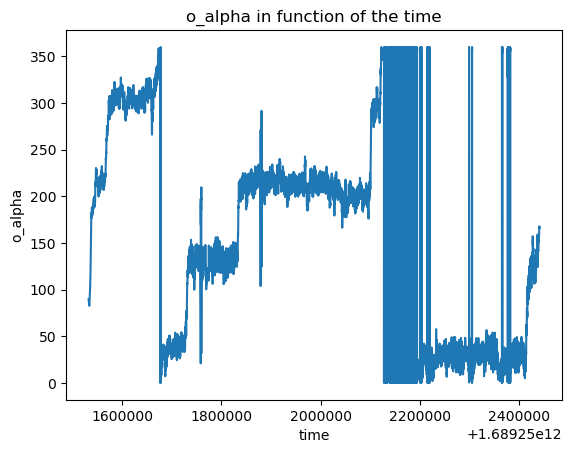

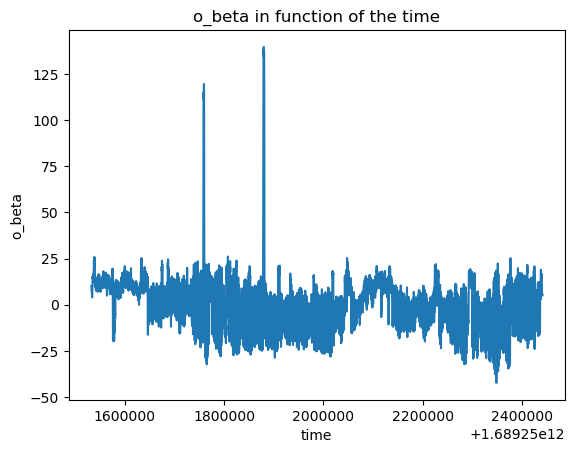

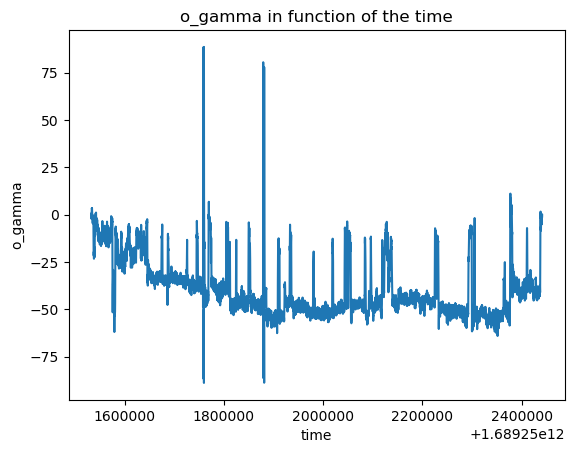

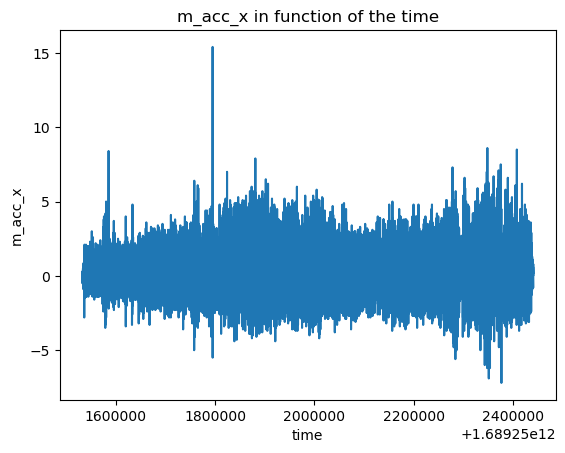

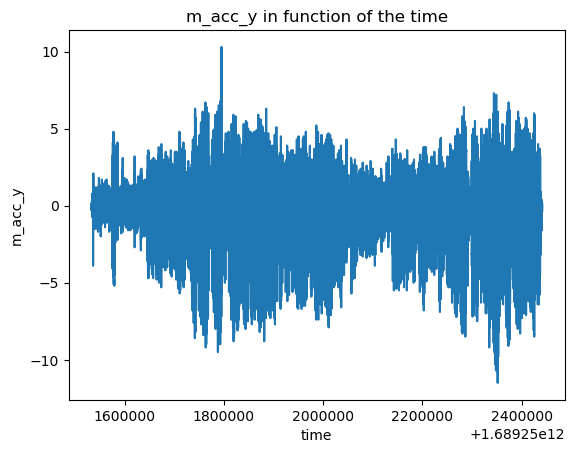

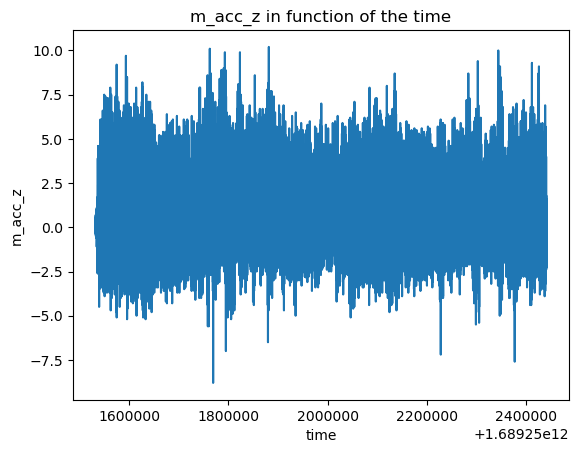

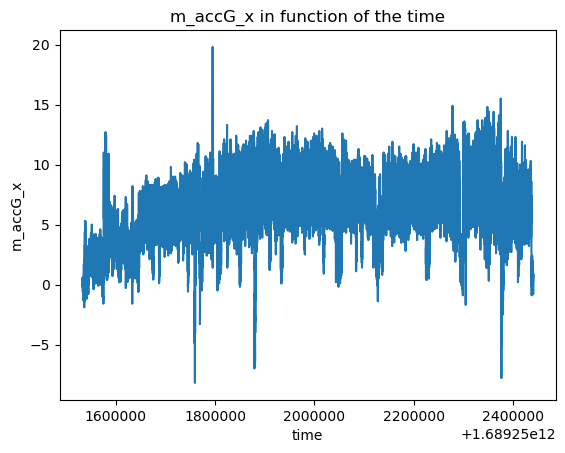

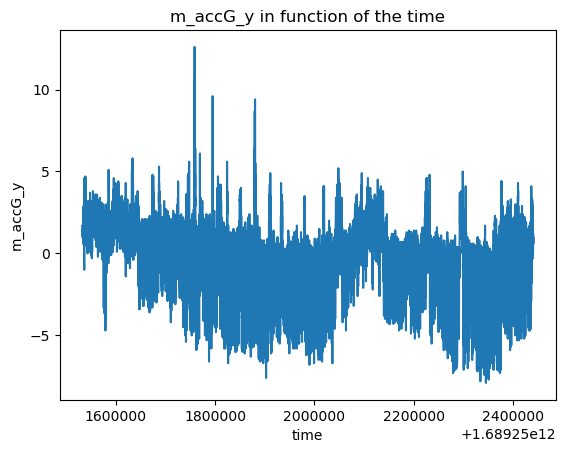

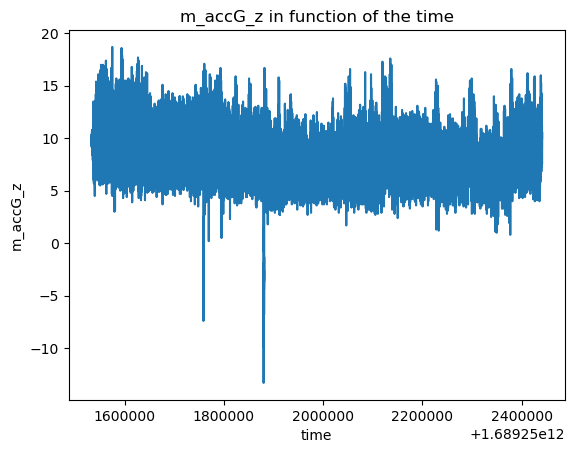

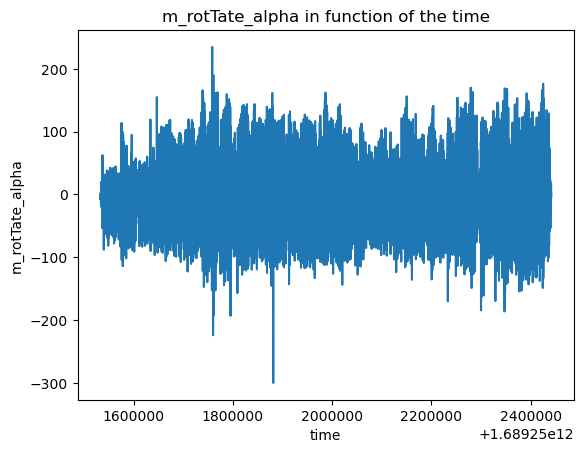

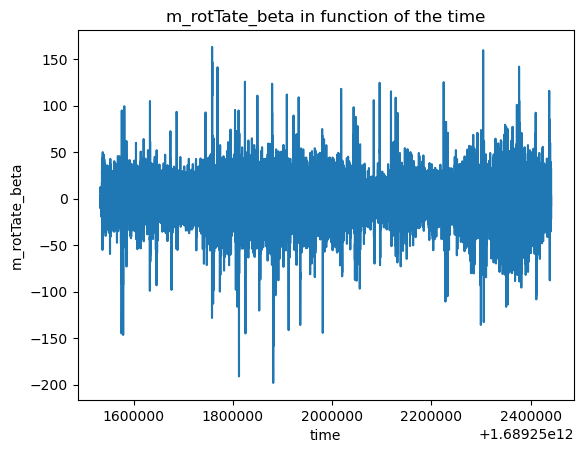

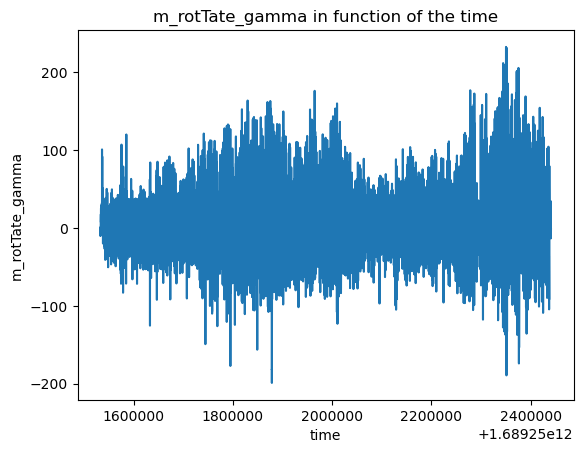

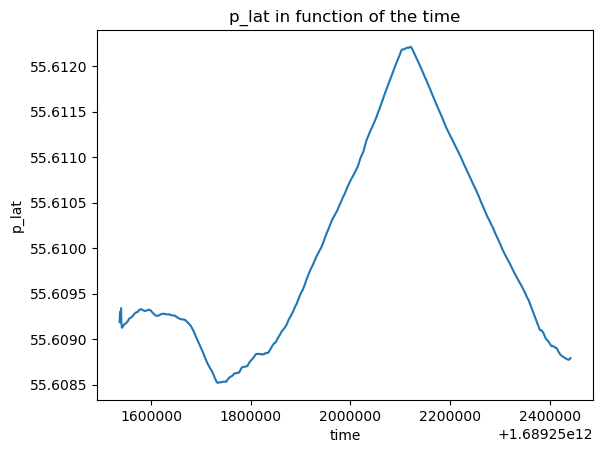

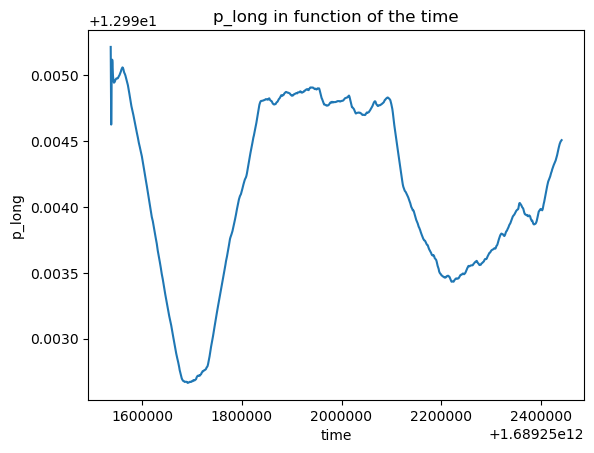

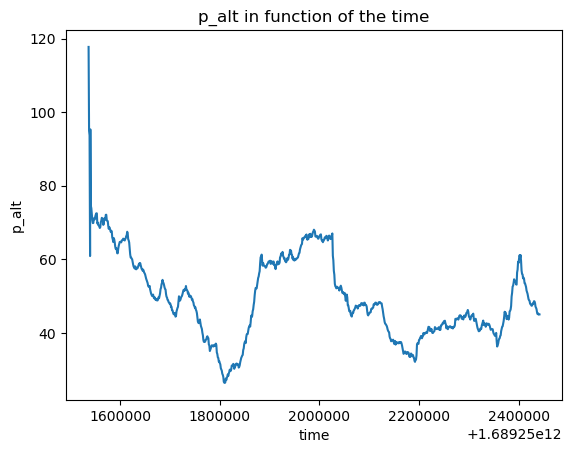

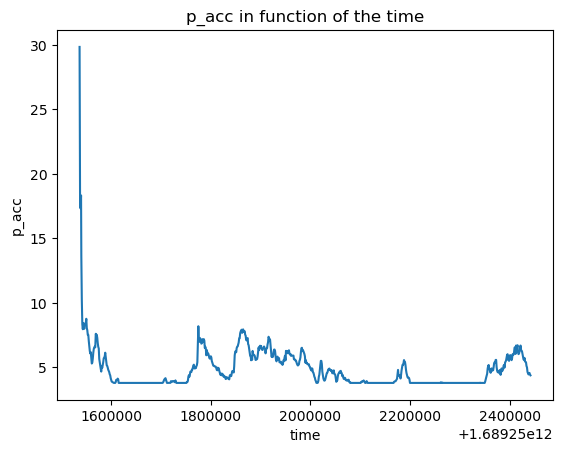

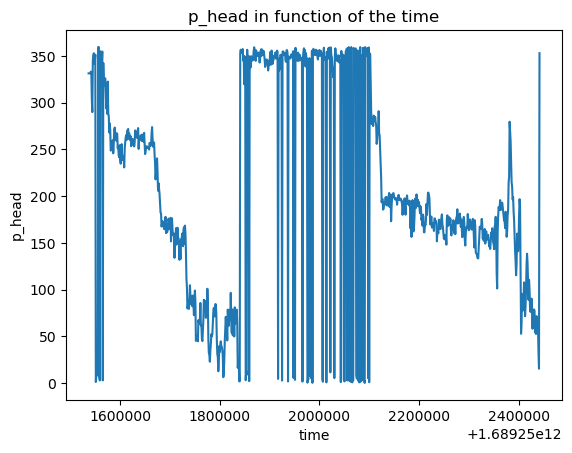

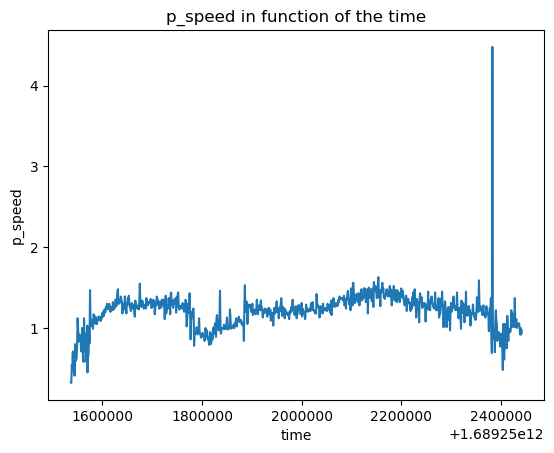

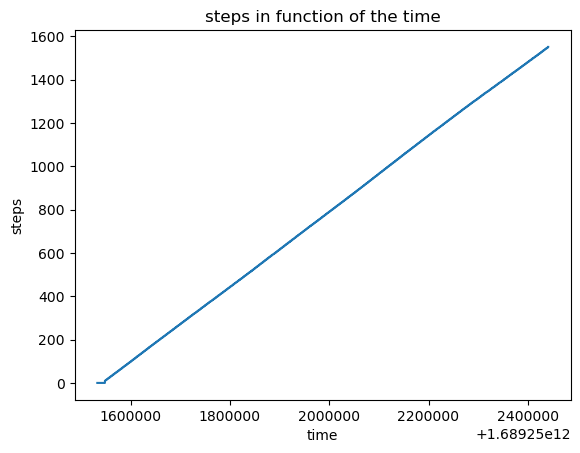

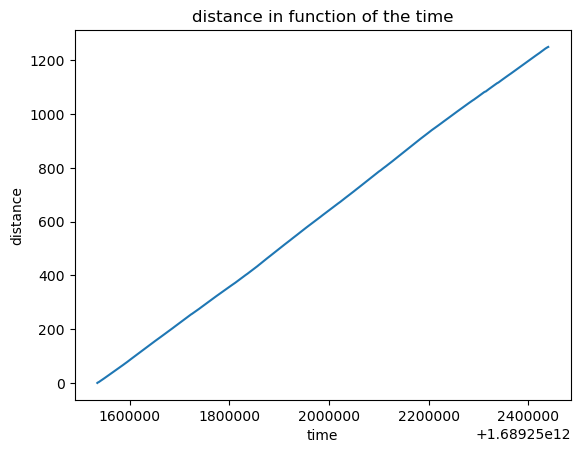

In [91]:
# plot graphs
for column in data.columns[1:-1]:
    if column == 'duration': break;
        
    data_dropna = data.dropna(subset=[column]) # remove lines where there isn't datas 

#     mean = data_dropna[column].mean()
#     std = data_dropna[column].std() 
#     threshold = mean + 3*std
#     data_filtered = data_dropna[data_dropna[column] <= threshold] # remove extrem values
    
#     x = data_filtered.time
#     y = data_filtered[column]

    x = data_dropna.time
    y = data_dropna[column]
    
    plt.plot(x,y)
    plt.xlabel('time')
    plt.ylabel(column)
    plt.title(column+' in function of the time')
    plt.show()



In [15]:
# plot trajectory on the map
import pandas as pd
import folium
from folium import plugins

# Coordinates for Malmö, Sweden
malmö_coords = (55.604980, 13.003822)
map_malmö = folium.Map(location=malmö_coords, zoom_start=14)

# keep only the lines where GPS coord is available
data_GPS = data.dropna(subset=['p_lat']) 

# Create a list of latitude and longitude coordinates
points = data_GPS[['p_lat', 'p_long']].values.tolist()

# Add the polyline to the map
folium.PolyLine(points, color='blue', weight=5, opacity=0.7).add_to(map_malmö)

map_malmö


